In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy as smp
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
from scipy import fftpack
from numpy import *

In [4]:
scope1 = pd.read_csv("scope_2.csv")
scope2 = pd.read_csv("scope_3.csv")
scope3 = pd.read_csv("scope_4.csv")
scope4 = pd.read_csv("scope_28.csv")
scope5 = pd.read_csv("scope_29.csv")

### Butterworth and derivative Function

In [25]:

def butter(order,signal,fc):
#     fc = 250
    fs = 30000
    wn = fc/15000
    b, a = scipy.signal.butter(order,wn, 'low', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

def derivate(signal):
    signal = np.array(signal)
    return np.diff(signal)

def SNR(order,signal,fc):
    filt = butter(order,signal,fc)
    noise = signal-filt
    x1 = np.average(filt**2)
    x2 = np.average(noise**2)
    return 10*(np.log10((x1)/x2))
   
def plotting(scope):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    #############################################
    filt = butter(2,ydata,250)
    #############################################
    filt2 = butter(3,ydata,250)
    #############################################
    filt3 = butter(4,ydata,250)
    #############################################
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.title(f"Original signal")
    plt.plot(xdatanew,ydata)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(222)
    plt.title(f"2nd order LPF with SNR {round(SNR(2,filt,250),2)}")
    plt.plot(xdatanew,filt)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(223)
    plt.title(f"3 rd order LPF with SNR {round(SNR(3,filt2,250),2)}")
    plt.plot(xdatanew,filt2)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(224)
    plt.title(f"4 th order LPF with SNR {round(SNR(4,filt3,250),2)}")
    plt.plot(xdatanew,filt3)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()

    
def crop(signal):
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    return  signal[mini[1]:mini[-2]]
#     peaks, _ = find_peaks(signal)
#     return  signal[peaks[0]:peaks[-1]]

def crop_plot(signal):
    signal = crop(signal)
    peaks, _ = find_peaks(signal)
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
#     plt.title(f" min_count = {len(mini)}, max_count = {len(peaks)}")
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "x")
    plt.plot(mini, signal[mini], "o")
    return (len(mini),len(peaks))
    
def crop_plotting(scope):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    #############################################
    filt0 = butter(1,ydata,250)
    #############################################
    filt = butter(2,ydata,250)
    #############################################
    filt2 = butter(3,ydata,250)
    #############################################
    filt3 = butter(4,ydata,250)
    #############################################
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.title(f"Original signal")
    n,m = crop_plot(filt0)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(222)
    
    m,n =crop_plot(filt)
    plt.title(f"2nd order LPF ,SNR {round(SNR(2,filt,250),2)},min_count {n} , max_count {m}")
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(223)
    plt.title(f"3rd order LPF ,SNR {round(SNR(3,filt2,250),2)},min_count {n} , max_count {m}")
    m,n =crop_plot(filt2)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(224)
    plt.title(f"4th order LPF, SNR {round(SNR(4,filt3,250),2)},min_count {n} , max_count {m}")
    m,n =crop_plot(filt3)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()

def diff_plotting(scope,title):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    ydata = crop(ydata)
    diff = butter(1,ydata,250)
    diff = derivate(diff)
    diff = butter(1,diff,30)
    #############################################
    filt = butter(2,ydata,250)
    filt = derivate(filt)
    filt = butter(2,filt,30)
    #############################################
    filt2 = butter(3,ydata,250)
    filt2 = derivate(filt2)
    filt2 = butter(3,filt2,30)
    #############################################
    filt3 = butter(4,ydata,250)
    filt3 = derivate(filt3)
    filt3 = butter(4,filt3,30)
    #############################################
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title(f"1st order low pass filter")
    plt.plot(xdatanew[:1982],diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(222)
    plt.title("2nd order low pass filter")
    plt.plot(xdatanew[:1982],filt)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(223)
    plt.title("3rd order low pass filter")
    plt.plot(xdatanew[:1982],filt2)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(224)
    plt.title("4th order low pass filter ")
    plt.plot(xdatanew[:1982],filt3)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()
    
def freq_resp(signal):
    f_s = 30000
    signal = np.array(signal)
    X = fftpack.fft(signal)
    freqs = fftpack.fftfreq(len(signal)) * f_s
#     fig, ax = plt.subplots()
    plt.stem(freqs, np.abs(X))
#     plt.xlabel('Frequency in Hertz [Hz]')
#     plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#     ax.set_xlim(-f_s / 2, f_s / 2)
    plt.xlim(0,500)
    plt.ylim(-50, 500)
    
    
def freq_resp_plotting(scope):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]

    diff = butter(1,ydata,250)
    filt = butter(2,ydata,250)
    filt2 = butter(3,ydata,250)
    filt3 = butter(4,ydata,250)

    plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.title("First order")
    freq_resp(ydata)
    plt.xlabel('Frequency in Hertz [Hz]')
    plt.ylabel('Frequency Domain (Spectrum) Magnitude')

    
    plt.subplot(222)
    plt.title("Second order")
    freq_resp(filt)
    plt.xlabel('Frequency in Hertz [Hz]')
    plt.ylabel('Frequency Domain (Spectrum) Magnitude')

    
    plt.subplot(223)
    plt.title("Thrid order")
    freq_resp(filt2)
    plt.xlabel('Frequency in Hertz [Hz]')
    plt.ylabel('Frequency Domain (Spectrum) Magnitude')
    
    
    plt.subplot(224)
    plt.title("Fourth order")
    freq_resp(filt3)
    plt.xlabel('Frequency in Hertz [Hz]')
    plt.ylabel('Frequency Domain (Spectrum) Magnitude')

    plt.show()  

#### Plotting Function



###### Delay                          SNR

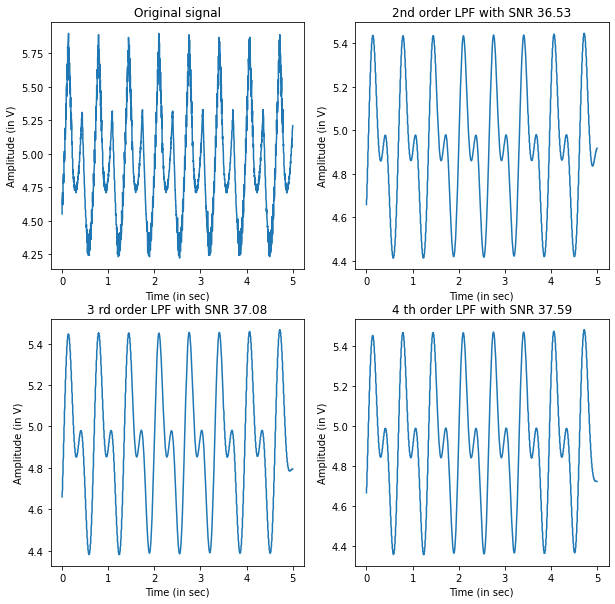

In [26]:
plotting(scope1)

#### Cropped marked plots 

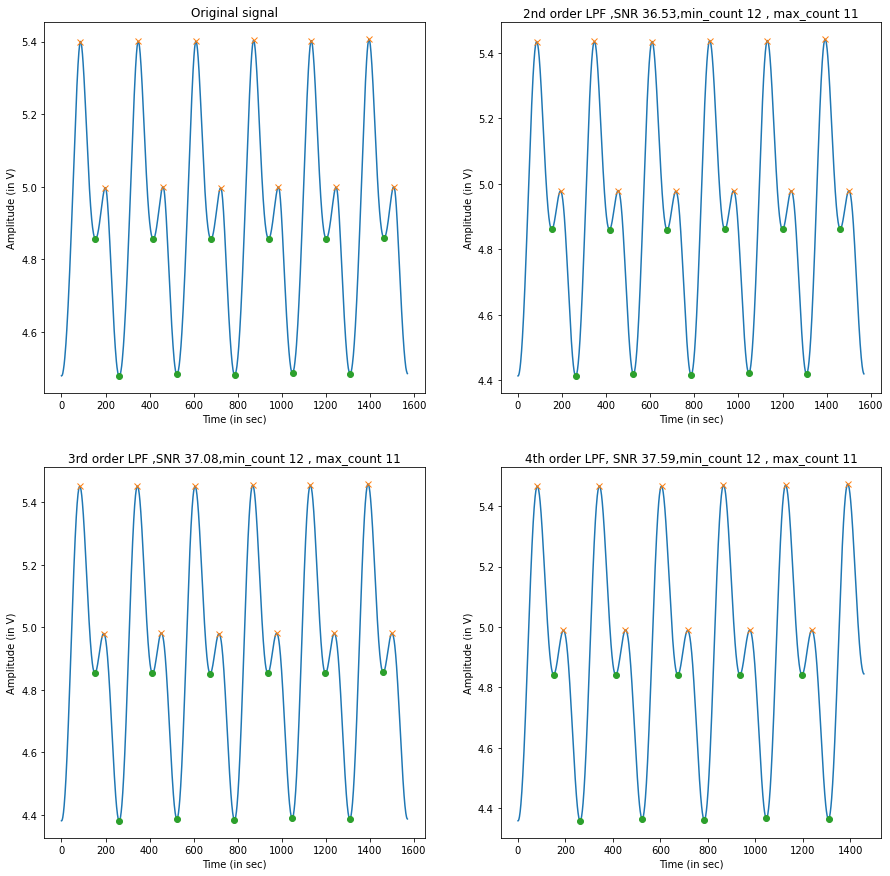

In [27]:
crop_plotting(scope1)

#### Filtered Differentiated Plots

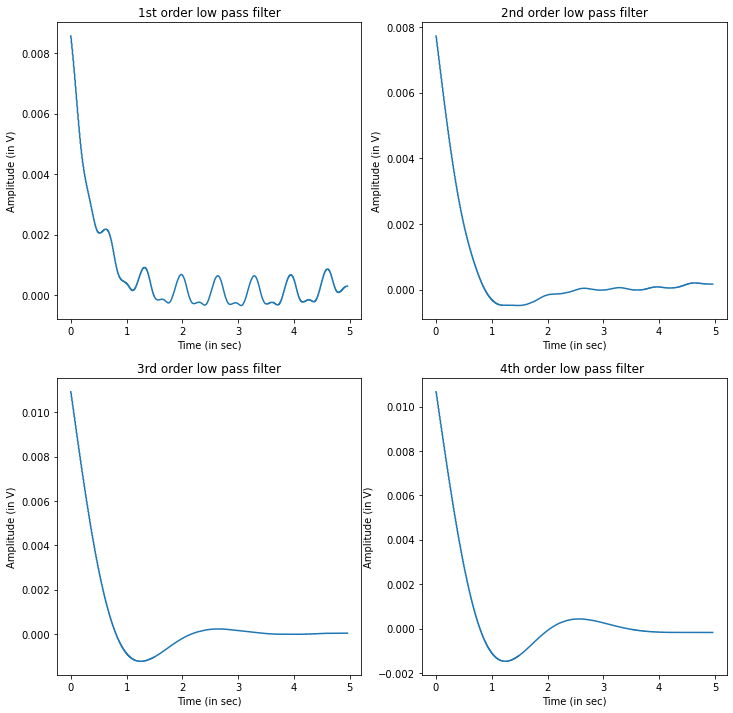

In [28]:
diff_plotting(scope2,"scope_3")

In [14]:
def overall_plot(scope,order):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    #############################################
    filt = butter(order,ydata,250)

    diff = derivate(filt)
    diff = butter(3,filt,30)


    plt.figure(figsize=(15,6))
    plt.subplot(131)
    plt.title(f"{order} order LPF with SNR {round(SNR(2,filt,250),2)}")
    crop_plot(filt)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(132)
    plt.title(f"Frequency Response {order} order")
    freq_resp(filt)
    plt.xlabel('Frequency in Hertz [Hz]')
    plt.ylabel('Frequency Domain (Spectrum) Magnitude')
    
    plt.subplot(133)
    plt.title(f"Differentiated Filtered signal")
    plt.plot(diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    

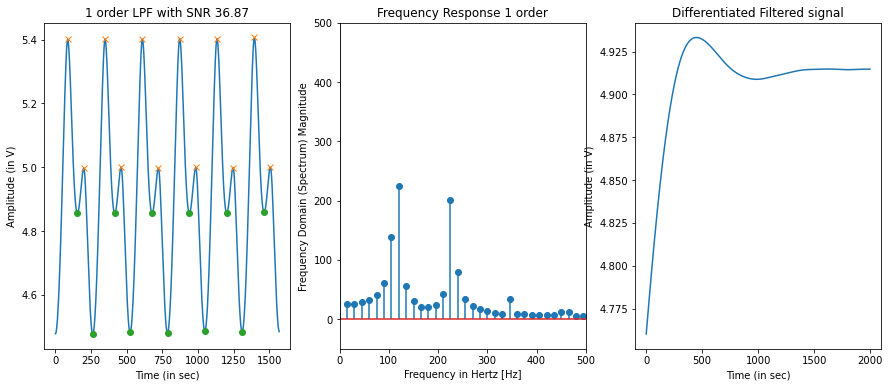

In [15]:
overall_plot(scope1,1)

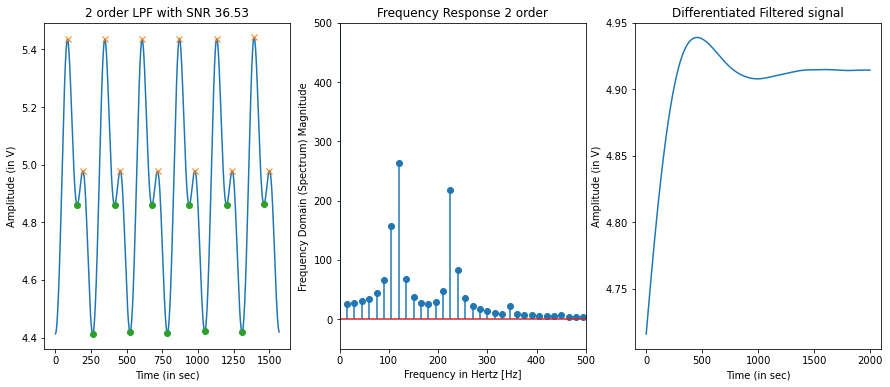

In [16]:
overall_plot(scope1,2)

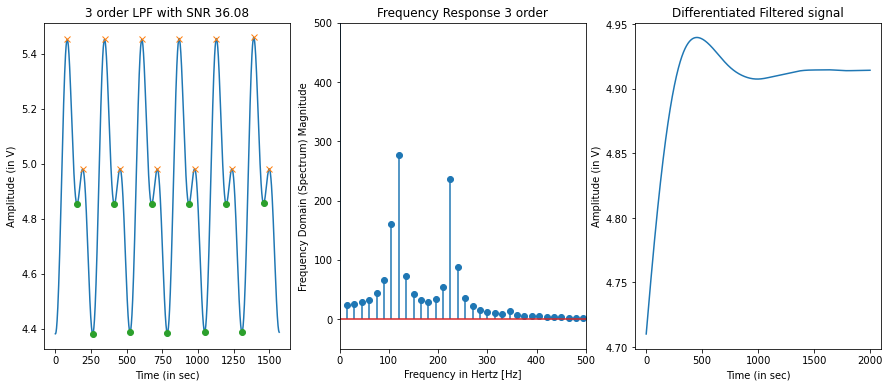

In [54]:
overall_plot(scope1,3)

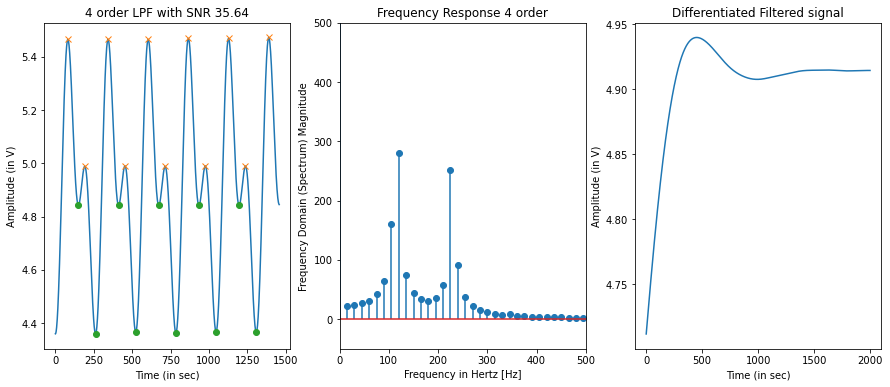

In [55]:
overall_plot(scope1,4)

In [59]:
def butterH(order,signal,fc):
#     fc = 250
    fs = 30000
    wn = fc/15000
    b, a = scipy.signal.butter(order,wn, 'high', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

In [60]:
def crop_plottingH(scope):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    #############################################
    filt0 = butterH(1,ydata,20)
    #############################################
    filt = butterH(2,ydata,20)
    #############################################
    filt2 = butterH(3,ydata,20)
    #############################################
    filt3 = butterH(4,ydata,20)
    #############################################
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.title(f"Original signal")
    n,m = crop_plot(filt0)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(222)
    
    m,n =crop_plot(filt)
    plt.title(f"2nd order LPF ,SNR {round(SNR(2,filt,250),2)},min_count {n} , max_count {m}")
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(223)
    plt.title(f"3rd order LPF ,SNR {round(SNR(3,filt2,250),2)},min_count {n} , max_count {m}")
    m,n =crop_plot(filt2)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    
    plt.subplot(224)
    plt.title(f"4th order LPF, SNR {round(SNR(4,filt3,250),2)},min_count {n} , max_count {m}")
    m,n =crop_plot(filt3)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

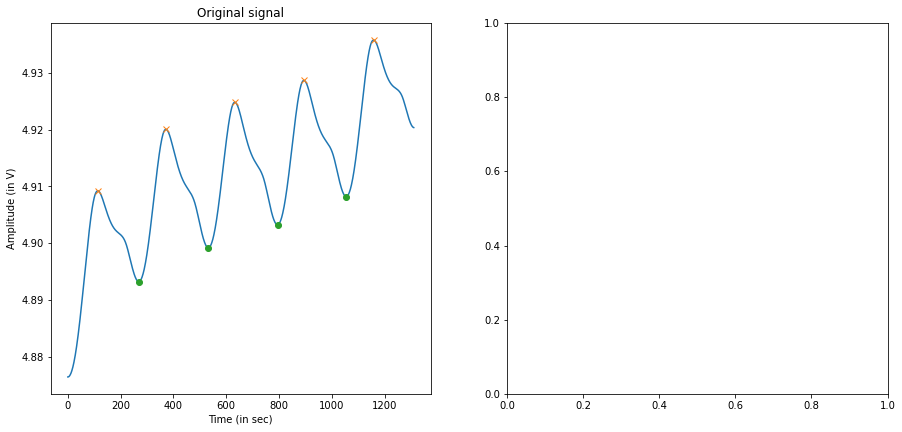

In [61]:
crop_plottingH(scope1)

#####  SNR 

In [10]:
#  Finding Signal to Noise ratio 
#  Task 3

def SNR(signal,fc):
    filt = butter(signal,fc)
    noise = signal-filt
    x1 = np.average(filt**2)
    x2 = np.average(noise**2)
    return 10*(np.log10((x1)/x2))
   

In [11]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope1,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.025159
1       200   27.376235
2       250   30.265273
3       300   33.002409
4       350   35.125288
5       400   36.632643


In [12]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope2,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.079987
1       200   27.420193
2       250   30.298141
3       300   33.030764
4       350   35.150335
5       400   36.651505


In [13]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope3,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.131474
1       200   27.445778
2       250   30.332760
3       300   33.098418
4       350   35.258833
5       400   36.799296


In [14]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope4,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.549497
1       200   27.933245
2       250   30.859435
3       300   33.609286
4       350   35.783133
5       400   37.402617


In [15]:
l = []
for i in range(150,400,50):
    l.append([i,SNR(scope5,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.658290
1       200   28.009793
2       250   30.903044
3       300   33.633242
4       350   35.798680


#### Find Peaks


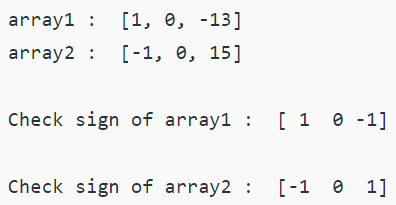

In [16]:
from numpy import *
def FindPeaks(signal):
    peaks, _ = find_peaks(signal) # local Maximum
    b = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1 #The +1 is important, because diff reduces the original index number.
    #local minimum
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "o")
    plt.plot(b, signal[b], "*") 
    plt.show()



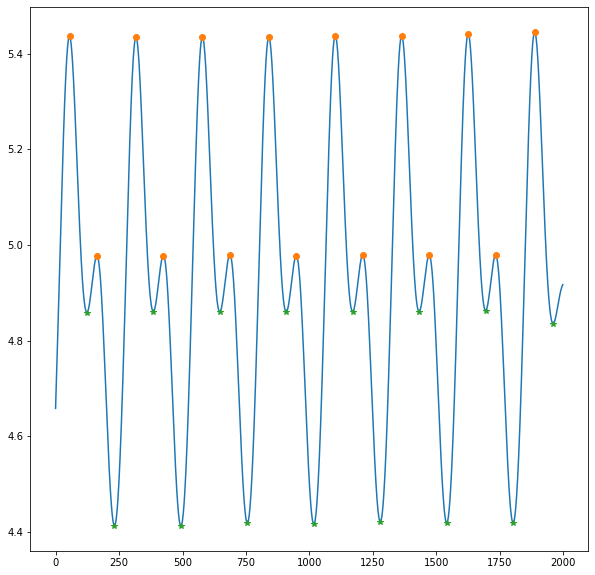

In [17]:
plt.figure(figsize=(10,10))
FindPeaks(filt)

In [ ]:

plt.magnitude_spectrum(filt, 30000, color='C1')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))

plt.title("filtered differentiated signal")
plt.plot(xdatanew[:1998],filt_diff)
plt.show

(-5.0, 900.0)

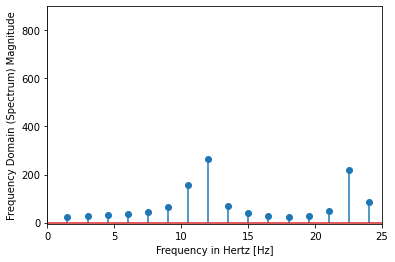

In [208]:
from scipy import fftpack

f_s = 3000
X = fftpack.fft(filt)
freqs = fftpack.fftfreq(len(filt)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_xlim(0,25)
ax.set_ylim(-5, 900)

In [48]:
def cheby1(signal):
    fc = 250
    fs = 30000
    wn = 2*fc/fs
    b, a = scipy.signal.cheby1(2,wn, 'low',output='ba', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

def derivate(signal):
    return np.diff(signal)

In [49]:
def plotting(scope,title):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    ydata  = np.array(ydata)
    filt = cheby1(ydata)
    diff = derivate(filt)
    filt_diff =cheby1(diff)

    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title(f"Original signal {title}")
    plt.plot(xdatanew,ydata)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(222)
    plt.title("Filtered signal")
    plt.plot(xdatanew,filt)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(223)
    plt.title("Differentiated signal")
    plt.plot(xdatanew[:1998],diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(224)
    plt.title("Filtered Differentiated siganl ")
    plt.plot(xdatanew[:1998],filt_diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()

In [50]:
plotting(scope5,"scope_29")

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'int'